# Plots of the results

In [5]:
import matplotlib.pyplot as plt
import os
import sys
import re

In [2]:
project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
print(project_root)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub


## Minibias


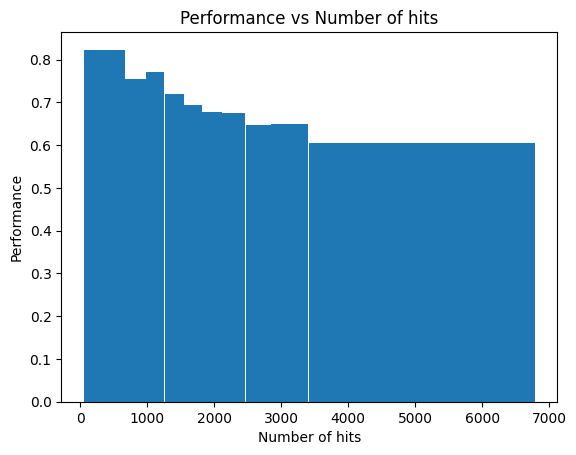

In [5]:

# Define the data for the subsets of events
bounds = [(51, 663), (664, 978), (980, 1255), (1257, 1549), (1550, 1812), (1819, 2119), (2121, 2464), (2468, 2853), (2854, 3405), (3412, 6786)]
lower_bounds = [b[0] for b in bounds]
upper_bounds = [b[1] for b in bounds]

# a list of performance scores for each subset
performance = [0.823, 0.754, 0.772, 0.719,0.694, 0.678, 0.674, 0.647, 0.65, 0.606] 

# Calculate the width of each bar
widths = [upper_bounds[i] - lower_bounds[i] for i in range(len(lower_bounds))]

# Create a bar chart
plt.bar(lower_bounds, performance, width=widths, align='edge')

# Add axis labels and title
plt.xlabel('Number of hits')
plt.ylabel('Performance')
plt.title('Performance vs Number of hits')

# Display the chart
plt.show()


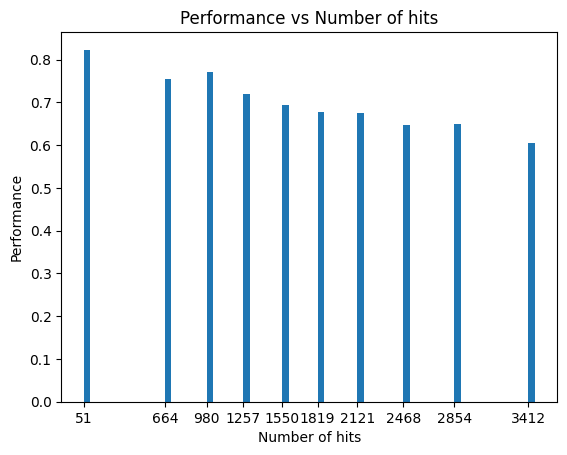

In [6]:
import matplotlib.pyplot as plt

# Define the data for the subsets of events
bounds = [(51, 663), (664, 978), (980, 1255), (1257, 1549), (1550, 1812), (1819, 2119), (2121, 2464), (2468, 2853), (2854, 3405), (3412, 6786)]
lower_bounds = [b[0] for b in bounds]
performance = [0.823, 0.754, 0.772, 0.719,0.694, 0.678, 0.674, 0.647, 0.65, 0.606] 

# Set a fixed width for all bars
width = 50

# Calculate the x positions of the bars
x_pos = [lower_bounds[i] + width/2 for i in range(len(lower_bounds))]

# Create a bar chart
plt.bar(x_pos, performance, width=width, align='center')

# Set the x-axis ticks to be the lower bounds of each subset
plt.xticks(lower_bounds)

# Add axis labels and title
plt.xlabel('Number of hits')
plt.ylabel('Performance')
plt.title('Performance vs Number of hits')

# Display the chart
plt.show()


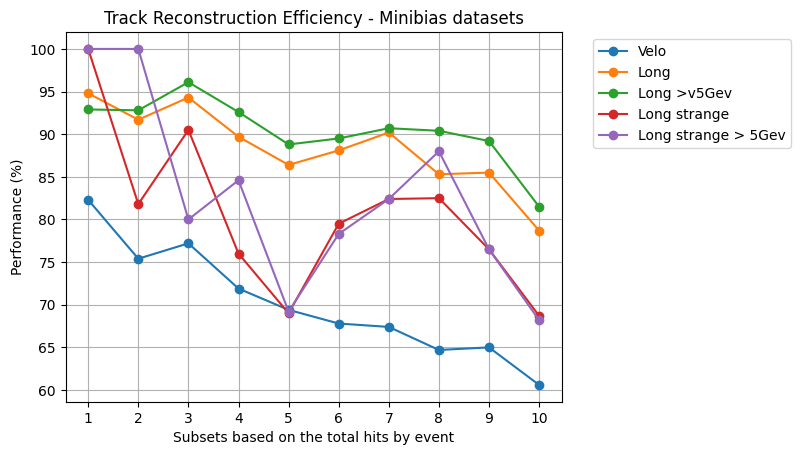

In [13]:

# Data
x = ['1','2','3','4','5','6','7','8','9','10']
velo = [82.3, 75.4, 77.2, 71.9, 69.4, 67.8, 67.4, 64.7, 65, 60.6]  
long = [94.8, 91.7, 94.3, 89.7, 86.4, 88.1, 90.2, 85.3, 85.5, 78.7] 
long_5Gev = [92.9, 92.8, 96.1, 92.6, 88.8, 89.5, 90.7, 90.4, 89.2, 81.5]
long_strange = [100, 81.8, 90.5, 76, 69, 79.5, 82.4, 82.5, 76.5, 68.7]
long_strange_5GeV = [100, 100, 80, 84.6, 69.2, 78.3, 82.4, 88, 76.5, 68.2]

# create a figure object
fig, ax = plt.subplots()

# plot points for performance variable 1
ax.plot(x, velo, marker='o', linestyle='-', label="Velo")

ax.plot(x, long, marker='o', linestyle='-', label="Long")

ax.plot(x, long_5Gev, marker='o', linestyle='-', label="Long >v5Gev")

ax.plot(x, long_strange, marker='o', linestyle='-', label="Long strange")

ax.plot(x, long_strange_5GeV, marker='o', linestyle='-', label="Long strange > 5Gev")


# add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# set axis labels and title
ax.set_xlabel('Subsets based on the total hits by event')
ax.set_ylabel('Performance (%)')
ax.set_title('Track Reconstruction Efficiency - Minibias datasets')

# show plot
plt.grid(True)
plt.show()


# Test performances importation (focus reconstruction efficiency)

Extract all metrics linked to 'velo'

In [26]:
metrics = {}
with open(file_path, 'r') as f:
    for line in f:
        if 'velo' in line:
            line = line.strip()
            velo_metrics = line.split(':')[1].strip().split()
            metrics['velo'] = float(velo_metrics[0].strip('%,'))
            metrics['velo_clones'] = float(velo_metrics[2].strip('%,'))
            metrics['velo_purity'] = float(velo_metrics[4].strip('%,'))
            metrics['velo_hitEff'] = float(velo_metrics[6].strip('%,'))
print(metrics)

{'velo': 512.0, 'velo_clones': 622.0, 'velo_purity': 82.3, 'velo_hitEff': 25.0}


Extract metrics link to the reconstruction efficiency (NB: they are recalculated from the number of tracks found/existing)

In [67]:
import re

with open(file_path, 'r') as f:
    text = f.read()

# Define regular expressions to extract percentages
patterns = {
    'velo': r'velo\s*:\s*(\d+)\s+from\s+(\d+)',
    'long': r'long\s*:\s*(\d+)\s+from\s+(\d+)',
    'long>5GeV': r'long>5GeV\s*:\s*(\d+)\s+from\s+(\d+)',
    'long_strange': r'long_strange\s*:\s*(\d+)\s+from\s+(\d+)',
    'long_strange>5GeV': r'long_strange>5GeV\s*:\s*(\d+)\s+from\s+(\d+)'
}

results = {}
for name, pattern in patterns.items():
    match = re.search(pattern, text)
    if match:
        numerator, denominator = match.groups()
        percentage = float(numerator) / float(denominator) * 100
        results[name] = percentage

print(results)


{'velo': 82.31511254019293, 'long': 94.77124183006535, 'long>5GeV': 92.85714285714286, 'long_strange': 100.0, 'long_strange>5GeV': 100.0}


Extract metrics link to the reconstruction efficiency (NB: they are recalculated from the number of tracks found/existing) for SEVERAL EXPERIMENT in one file

In [81]:
# Get file path
exp_name = 'results_minibias_samples_hits'
file_path = project_root + "/results/" + exp_name + ".txt"

# Read file
with open(file_path, "r") as f:
    file_contents = f.read()

#Define expriments
experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

#Loop over each expriment in the file
for experiment in experiments:

    title = re.search(r"Experiment.*", experiment).group()
    results = re.search(r"ID of each event.*", experiment, re.DOTALL).group()
    text = results

    # Define regular expressions to extract percentages
    patterns = {
    'velo': r'velo\s*:\s*(\d+)\s+from\s+(\d+)',
    'long': r'long\s*:\s*(\d+)\s+from\s+(\d+)',
    'long>5GeV': r'long>5GeV\s*:\s*(\d+)\s+from\s+(\d+)',
    'long_strange': r'long_strange\s*:\s*(\d+)\s+from\s+(\d+)',
    'long_strange>5GeV': r'long_strange>5GeV\s*:\s*(\d+)\s+from\s+(\d+)'
    }

    metrics = {}
    for name, pattern in patterns.items():
        match = re.search(pattern, text)
        if match:
            numerator, denominator = match.groups()
            percentage = float(numerator) / float(denominator) * 100
            metrics[name] = percentage

    print(title)
    print(metrics)



Experiment Test of the Hopfield network on the 1th sample minibias dataset
{'velo': 82.31511254019293, 'long': 94.77124183006535, 'long>5GeV': 92.85714285714286, 'long_strange': 100.0, 'long_strange>5GeV': 100.0}
Experiment Test of the Hopfield network on the 2th sample minibias dataset
{'velo': 75.44351073762839, 'long': 91.6955017301038, 'long>5GeV': 92.78350515463917, 'long_strange': 81.81818181818183, 'long_strange>5GeV': 100.0}
Experiment Test of the Hopfield network on the 3th sample minibias dataset
{'velo': 77.2269558481797, 'long': 94.33962264150944, 'long>5GeV': 96.05263157894737, 'long_strange': 90.47619047619048, 'long_strange>5GeV': 80.0}
Experiment Test of the Hopfield network on the 4th sample minibias dataset
{'velo': 71.85901080159182, 'long': 89.71553610503283, 'long>5GeV': 92.56505576208178, 'long_strange': 76.0, 'long_strange>5GeV': 84.61538461538461}
Experiment Test of the Hopfield network on the 5th sample minibias dataset
{'velo': 69.44837340876944, 'long': 86.35

Extract metrics link to the reconstruction efficiency for several expriment in one file and creating a dictionary 

 (NB: the metrics are recalculated from the number of tracks found/existing)

In [64]:

# Get file path
exp_name = 'results_minibias_samples_hits'
file_path = project_root + "/results/" + exp_name + ".txt"

# Read file
with open(file_path, "r") as f:
    file_contents = f.read()

# Define experiments
experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

# Create a dictionary to store the results
performance_dict = {}

# Loop over each experiment in the file
for experiment in experiments:

    title = re.search(r"Experiment.*", experiment).group()
    results = re.search(r"ID of each event.*", experiment, re.DOTALL).group()
    text = results

    # Define regular expressions to extract percentages
    patterns = {
        'velo': r'velo\s*:\s*(\d+)\s+from\s+(\d+)',
        'long': r'long\s*:\s*(\d+)\s+from\s+(\d+)',
        'long>5GeV': r'long>5GeV\s*:\s*(\d+)\s+from\s+(\d+)',
        'long_strange': r'long_strange\s*:\s*(\d+)\s+from\s+(\d+)',
        'long_strange>5GeV': r'long_strange>5GeV\s*:\s*(\d+)\s+from\s+(\d+)'
    }

    metrics = {}
    for name, pattern in patterns.items():
        match = re.search(pattern, text)
        if match:
            numerator, denominator = match.groups()
            percentage = float(numerator) / float(denominator) * 100
            metrics[name] = percentage

    # Add the title and metrics to the results dictionary
    performance_dict[title] = metrics

# Print the results dictionary
print(performance_dict)


{'Experiment Test of the Hopfield network on the 1th sample minibias dataset': {'velo': 82.31511254019293, 'long': 94.77124183006535, 'long>5GeV': 92.85714285714286, 'long_strange': 100.0, 'long_strange>5GeV': 100.0}, 'Experiment Test of the Hopfield network on the 2th sample minibias dataset': {'velo': 75.44351073762839, 'long': 91.6955017301038, 'long>5GeV': 92.78350515463917, 'long_strange': 81.81818181818183, 'long_strange>5GeV': 100.0}, 'Experiment Test of the Hopfield network on the 3th sample minibias dataset': {'velo': 77.2269558481797, 'long': 94.33962264150944, 'long>5GeV': 96.05263157894737, 'long_strange': 90.47619047619048, 'long_strange>5GeV': 80.0}, 'Experiment Test of the Hopfield network on the 4th sample minibias dataset': {'velo': 71.85901080159182, 'long': 89.71553610503283, 'long>5GeV': 92.56505576208178, 'long_strange': 76.0, 'long_strange>5GeV': 84.61538461538461}, 'Experiment Test of the Hopfield network on the 5th sample minibias dataset': {'velo': 69.448373408

Function to extract metrics link to the reconstruction efficiency for several expriment in one file and creating a dictionary 

 (NB: the metrics are recalculated from the number of tracks found/existing)

In [77]:
def get_recon_eff_experiments(exp_name):
    # Get file path
    file_path = project_root + "/results/" + exp_name + ".txt"

    # Read file
    with open(file_path, "r") as f:
        file_contents = f.read()

    # Define experiments
    experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

    # Create a dictionary to store the results
    performance_dict = {}

    # Loop over each experiment in the file
    for experiment in experiments:
        title = re.search(r"Experiment.*", experiment).group()
        text = re.search(r"ID of each event.*", experiment, re.DOTALL).group()

    # Define regular expressions to extract percentages
        patterns = {
        'velo': r'velo\s*:\s*(\d+)\s+from\s+(\d+)',
        'long': r'long\s*:\s*(\d+)\s+from\s+(\d+)',
        'long>5GeV': r'long>5GeV\s*:\s*(\d+)\s+from\s+(\d+)',
        'long_strange': r'long_strange\s*:\s*(\d+)\s+from\s+(\d+)',
        'long_strange>5GeV': r'long_strange>5GeV\s*:\s*(\d+)\s+from\s+(\d+)'
        }

        metrics = {}
        for name, pattern in patterns.items():
            match = re.search(pattern, text)
            if match:
                numerator, denominator = match.groups()
                percentage = float(numerator) / float(denominator) * 100
                metrics[name] = percentage

    # Add the title and metrics to the results dictionary
        performance_dict[title] = metrics

    # Return the results dictionary
    return performance_dict

In [80]:
performance_minibias_hits = get_recon_eff_experiments('results_minibias_samples_hits')
print(performance_minibias_hits)


{'Experiment Test of the Hopfield network on the 1th sample minibias dataset': {'velo': 82.31511254019293, 'long': 94.77124183006535, 'long>5GeV': 92.85714285714286, 'long_strange': 100.0, 'long_strange>5GeV': 100.0}, 'Experiment Test of the Hopfield network on the 2th sample minibias dataset': {'velo': 75.44351073762839, 'long': 91.6955017301038, 'long>5GeV': 92.78350515463917, 'long_strange': 81.81818181818183, 'long_strange>5GeV': 100.0}, 'Experiment Test of the Hopfield network on the 3th sample minibias dataset': {'velo': 77.2269558481797, 'long': 94.33962264150944, 'long>5GeV': 96.05263157894737, 'long_strange': 90.47619047619048, 'long_strange>5GeV': 80.0}, 'Experiment Test of the Hopfield network on the 4th sample minibias dataset': {'velo': 71.85901080159182, 'long': 89.71553610503283, 'long>5GeV': 92.56505576208178, 'long_strange': 76.0, 'long_strange>5GeV': 84.61538461538461}, 'Experiment Test of the Hopfield network on the 5th sample minibias dataset': {'velo': 69.448373408

In [84]:
# Get the 'velo' values for each experiment in the order they appear in the dictionary
velo_values = []
for title, metrics in performance_minibias_hits.items():
    velo = metrics['velo']
    velo_values.append(velo)

# Print the velo values
print(velo_values)


[82.31511254019293, 75.44351073762839, 77.2269558481797, 71.85901080159182, 69.44837340876944, 67.77777777777779, 67.3913043478261, 64.74775611265862, 65.0487997889739, 60.566247224278314]


In [88]:
#Fct
def extract_metric_dict(dict, metric_name):
    metric_values = []
    for title, metrics in dict.items():
        value = metrics[metric_name]
        metric_values.append(value)
    return metric_values

#Test
velo = extract_metric_dict(performance_minibias_hits, 'velo')
print(velo)


[82.31511254019293, 75.44351073762839, 77.2269558481797, 71.85901080159182, 69.44837340876944, 67.77777777777779, 67.3913043478261, 64.74775611265862, 65.0487997889739, 60.566247224278314]


In [98]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']

metric_lists = {}
for metric_name in metrics_names:
    metric_lists[metric_name] = extract_metric_dict(performance_minibias_hits, metric_name)

print(metric_lists)
print(metric_lists['velo'])
#velo_values = metric_lists['velo']



{'velo': [82.31511254019293, 75.44351073762839, 77.2269558481797, 71.85901080159182, 69.44837340876944, 67.77777777777779, 67.3913043478261, 64.74775611265862, 65.0487997889739, 60.566247224278314], 'long': [94.77124183006535, 91.6955017301038, 94.33962264150944, 89.71553610503283, 86.35547576301616, 88.1024096385542, 90.24725274725274, 85.32423208191126, 85.51401869158879, 78.70182555780933], 'long>5GeV': [92.85714285714286, 92.78350515463917, 96.05263157894737, 92.56505576208178, 88.76080691642652, 89.54869358669833, 90.65217391304347, 90.41095890410958, 89.19708029197079, 81.48558758314856], 'long_strange': [100.0, 81.81818181818183, 90.47619047619048, 76.0, 68.96551724137932, 79.48717948717949, 82.35294117647058, 82.45614035087719, 76.47058823529412, 68.67469879518072], 'long_strange>5GeV': [100.0, 100.0, 80.0, 84.61538461538461, 69.23076923076923, 78.26086956521739, 82.35294117647058, 88.0, 81.48148148148148, 68.18181818181817]}
[82.31511254019293, 75.44351073762839, 77.2269558481

### Plot

In [140]:
def plot_reconstruction_eff_expriments(exp_name, metrics_names, dataset, ax=None):

    # Get the performance
    performance_dict = get_recon_eff_experiments(exp_name)

    # Plot 
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6), sharex=True)
    
    #X
    x = range(1,len(performance_dict)+1,1)
    
    # Bounds
    #if dataset == 'minibias':
        #x = ['1','2','3','4','5','6','7','8','9','10']
    #    bounds = [(51, 663), (664, 978), (980, 1255), (1257, 1549), (1550, 1812), (1819, 2119), (2121, 2464), (2468, 2853), (2854, 3405), (3412, 6786)]
    #if dataset == 'bsphiphi':
        #x = ['1','2','3','4','5','6','7','8','9','10']        

    # Y
    for metric_name in metrics_names:
        # Extract the list of values for the current metric
        metric_values = extract_metric_dict(performance_dict, metric_name)
        # Plot the metric values against the x-axis
        ax.plot(x, metric_values, marker='o', linestyle='-', label=metric_name)

    # Add labels and legend
    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Performance for {exp_name}')
    plt.grid(True, color='grey', linewidth=0.5)
    ax.legend(loc='upper right')


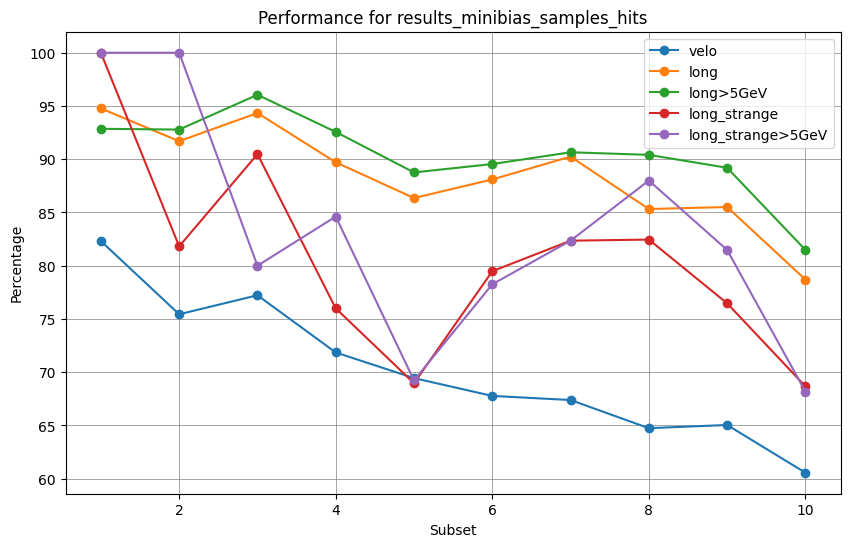

In [142]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_samples_hits'
dataset = 'minibias'

plot_reconstruction_eff_expriments(exp_name, metrics_names, dataset)

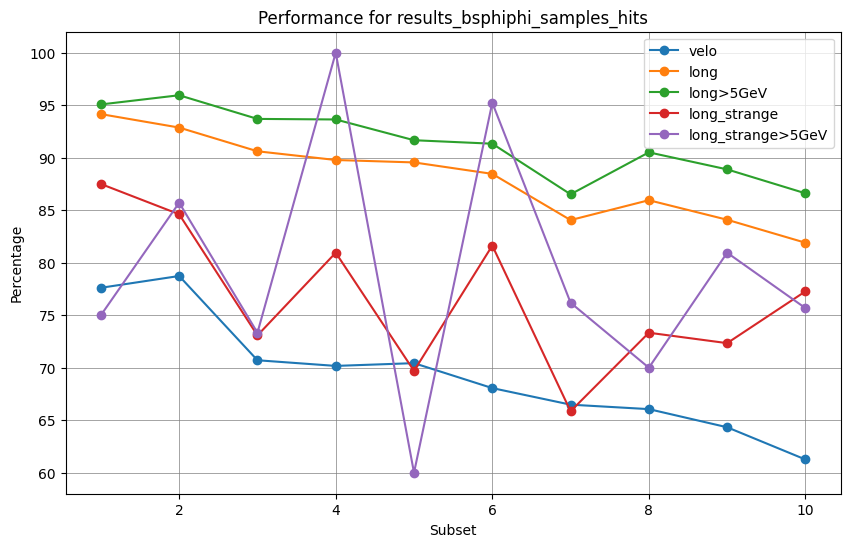

In [165]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_bsphiphi_samples_hits'
dataset = 'bsphiphi'

plot_reconstruction_eff_expriments(exp_name, metrics_names, dataset)

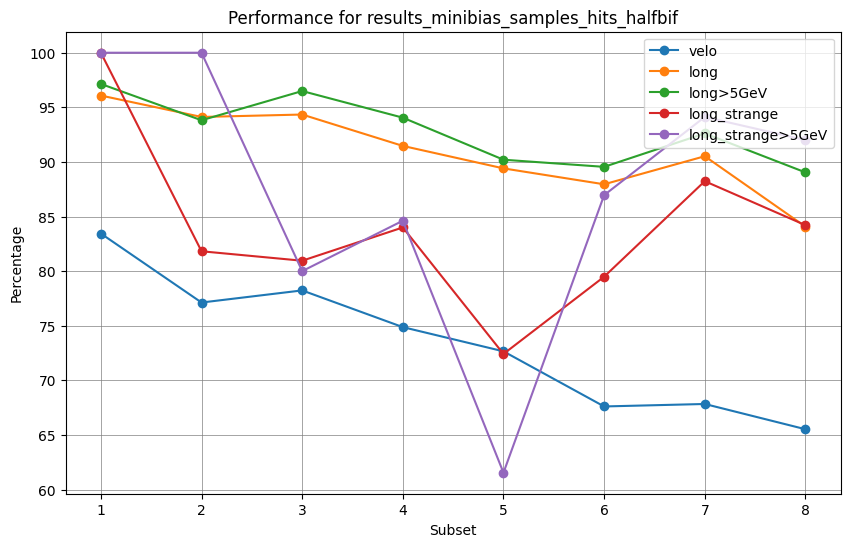

In [143]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_samples_hits_halfbif'
dataset = 'minibias'

plot_reconstruction_eff_expriments(exp_name, metrics_names, dataset)

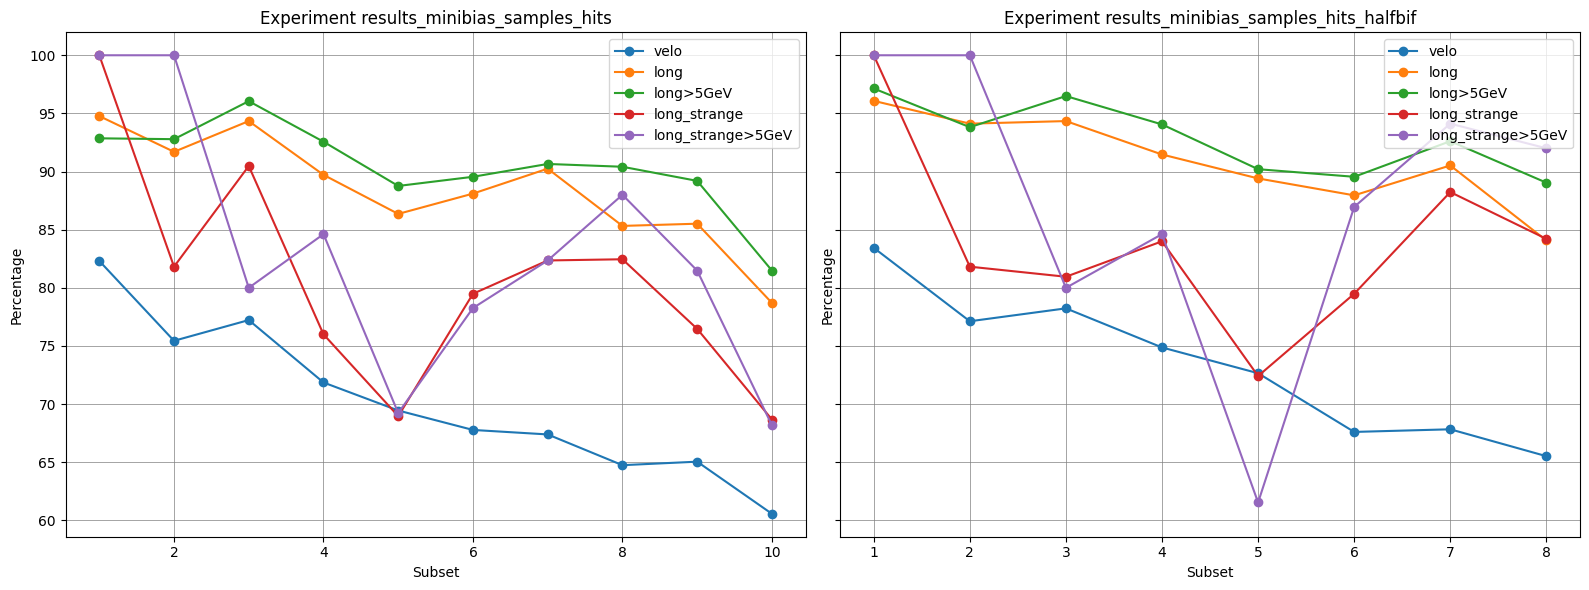

In [164]:
# Define the experiments and metrics to plot
exp1_name = 'results_minibias_samples_hits'
exp2_name = 'results_minibias_samples_hits_halfbif'
metrics_names = ['velo', 'long', 'long>5GeV', 'long_strange', 'long_strange>5GeV']

# Plot the experiments side by side
fig, axs = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

# Plot experiment 1 on the left subplot
ax = axs[0]
plot_reconstruction_eff_expriments(exp1_name, metrics_names, dataset='minibias', ax=ax)
ax.set_title(f'Experiment {exp1_name}')
ax.grid(True, color='grey', linewidth=0.5)


# Plot experiment 2 on the right subplot
ax = axs[1]
plot_reconstruction_eff_expriments(exp2_name, metrics_names, dataset='minibias', ax=ax)
ax.set_title(f'Experiment {exp2_name}')

# Adjust the layout
plt.tight_layout()


In [160]:
def plot_reconstruction_eff_experiments_multiple(exp_names, metrics_names):
    # Get the performances for each experiment
    performances_dict = {}
    for exp_name in exp_names:
        performances_dict[exp_name] = get_recon_eff_experiments(exp_name)

    # Create the x-axis range for each experiment
    x = [range(1, len(performances_dict[exp_name]) + 1) for exp_name in exp_names]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each metric for each experiment
    for i, metric_name in enumerate(metrics_names):
        for j, exp_name in enumerate(exp_names):
            # Extract the list of values for the current metric and experiment
            metric_values = extract_metric_dict(performances_dict[exp_name], metric_name)
            # Plot the metric values against the x-axis for the current experiment
            ax.plot(x[j], metric_values, marker='o', linestyle='-', label=metric_name + ' (' + exp_name + ')')

    # Add labels and legend
    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title('Performance for experiments')
    plt.grid(True, color='grey', linewidth=0.5)
    ax.legend(loc='upper right')


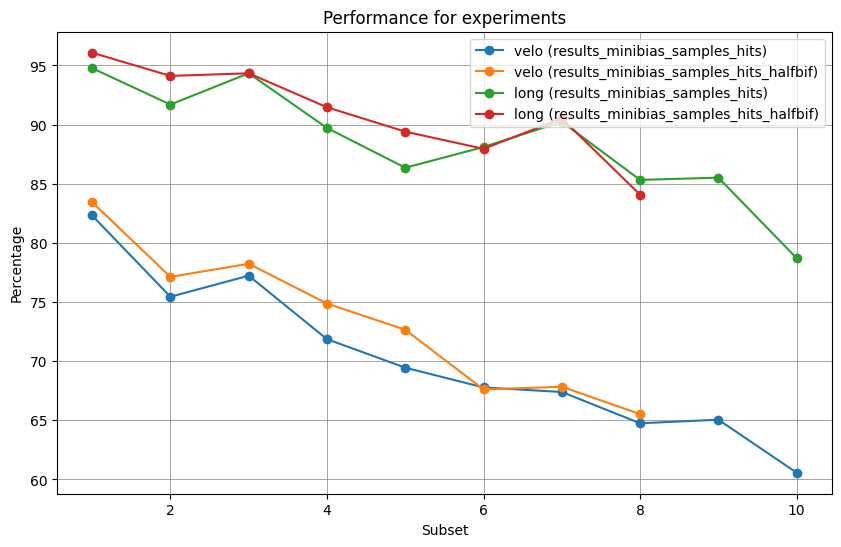

In [171]:
exp_names = ['results_minibias_samples_hits', 'results_minibias_samples_hits_halfbif']
metrics_names = ['velo', 'long']
plot_reconstruction_eff_experiments_multiple(exp_names, metrics_names)


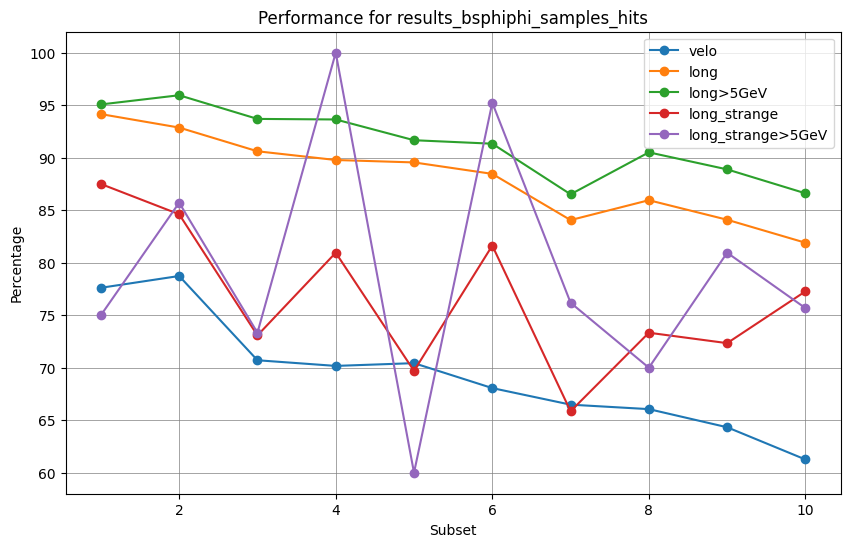